In [91]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random
from datetime import datetime, timedelta
%matplotlib inline

In [92]:
#Função para gerar dados ficticios
def gerar_dados(num_registros = 600):
    print(f'\nIniciando a geração de {num_registros} dados de vendas...')

    produtos = {
        'Mouse Vertical': {'categoria': 'Eletrônicos', 'preco': 7500.00 },
        'Laptop Gamer': {'categoria': 'Acessórios', 'preco': 250.00},
        'Teclado Mecânico': {'categoria': 'Acessórios', 'preco':  550.00},
        'Monitor Ultrawide': {'categoria': 'Eletrônicos', 'preco': 2800.00},
        'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 1200.00},
        'Headset 7.1': {'categoria': 'Acessórios', 'preco': 800.00},
        'Placa de Vídeo': {'categoria': 'Hardware', 'preco': 4500},
        'SSD 1TB': {'categoria': 'Hardware', 'preco': 600.00},
        'HD': {'categoria': 'Hardware', 'preco': 300.00},
        'Mouse comum': {'categoria': 'Acessórios', 'preco': 200.00}
    }

    cidade_estados = {
        'Sao Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG',
        'Porto Alegre': 'RS', 'Salvador': 'BA', 'Curitiba': 'PR', 'Fortaleza': 'CE'
    }

    lista_produtos = list(produtos.keys())
    lista_cidades = list(cidade_estados.keys())

    

    data_inicial = datetime(2026, 1, 1)

    dados_vendas = []
    for i in range(num_registros):
        nome_produto = random.choice(lista_produtos)
        cidade = random.choice(lista_cidades)
        quantidade = np.random.randint(1, 8)
        data_pedido = data_inicial + timedelta(days = int(i/5), hours = random.randint(0, 23))

        if nome_produto in ('Mouse', 'Teclado'):
            preco_unitario = produtos[nome_produto]['preco']*np.random.uniform(0.9, 1.0)
        else:
            preco_unitario = produtos[nome_produto]['preco']

        dados_vendas.append({
            'ID_Pedido': 1000 + i,
            'Data_Pedido': data_pedido,
            'Nome_Produto': nome_produto,
            'Categoria': produtos[nome_produto]['categoria'],
            'Preco_Unitario': round(preco_unitario, 2),
            'Quantidade': quantidade,
            'ID_Cliente': np.random.randint(100, 150),
            'Cidade': cidade,
            'Estado': cidade_estados[cidade]

        })
    
    print('Geração de dados concluída.\n')
    return pd.DataFrame(dados_vendas)

In [93]:
df_vendas = gerar_dados(1500)


Iniciando a geração de 1500 dados de vendas...
Geração de dados concluída.



In [94]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 10:00:00,Teclado Mecânico,Acessórios,550.0,5,127,Sao Paulo,SP
1,1001,2026-01-01 15:00:00,SSD 1TB,Hardware,600.0,4,116,Curitiba,PR
2,1002,2026-01-01 06:00:00,Laptop Gamer,Acessórios,250.0,6,118,Sao Paulo,SP
3,1003,2026-01-01 23:00:00,Mouse Vertical,Eletrônicos,7500.0,4,141,Sao Paulo,SP
4,1004,2026-01-01 18:00:00,Mouse comum,Acessórios,200.0,4,100,Curitiba,PR


In [95]:

df_vendas['Data_Pedido'] = pd.to_datetime(df_vendas['Data_Pedido'])
df_vendas['Faturamento'] = df_vendas['Preco_Unitario']*df_vendas['Quantidade']
df_vendas['Status de Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rápida' if estado in ('SP', 'RJ', 'MG') else 'Normal')



In [96]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status de Entrega
0,1000,2026-01-01 10:00:00,Teclado Mecânico,Acessórios,550.0,5,127,Sao Paulo,SP,2750.0,Rápida
1,1001,2026-01-01 15:00:00,SSD 1TB,Hardware,600.0,4,116,Curitiba,PR,2400.0,Normal
2,1002,2026-01-01 06:00:00,Laptop Gamer,Acessórios,250.0,6,118,Sao Paulo,SP,1500.0,Rápida
3,1003,2026-01-01 23:00:00,Mouse Vertical,Eletrônicos,7500.0,4,141,Sao Paulo,SP,30000.0,Rápida
4,1004,2026-01-01 18:00:00,Mouse comum,Acessórios,200.0,4,100,Curitiba,PR,800.0,Normal


In [97]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Pedido          1500 non-null   int64         
 1   Data_Pedido        1500 non-null   datetime64[ns]
 2   Nome_Produto       1500 non-null   object        
 3   Categoria          1500 non-null   object        
 4   Preco_Unitario     1500 non-null   float64       
 5   Quantidade         1500 non-null   int64         
 6   ID_Cliente         1500 non-null   int64         
 7   Cidade             1500 non-null   object        
 8   Estado             1500 non-null   object        
 9   Faturamento        1500 non-null   float64       
 10  Status de Entrega  1500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 129.0+ KB


In [98]:
top_10prod = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)

top_10prod

Nome_Produto
Laptop Gamer         677
Cadeira Gamer        672
Mouse Vertical       642
SSD 1TB              633
Placa de Vídeo       623
Monitor Ultrawide    620
Mouse comum          599
Headset 7.1          553
HD                   534
Teclado Mecânico     530
Name: Quantidade, dtype: int64

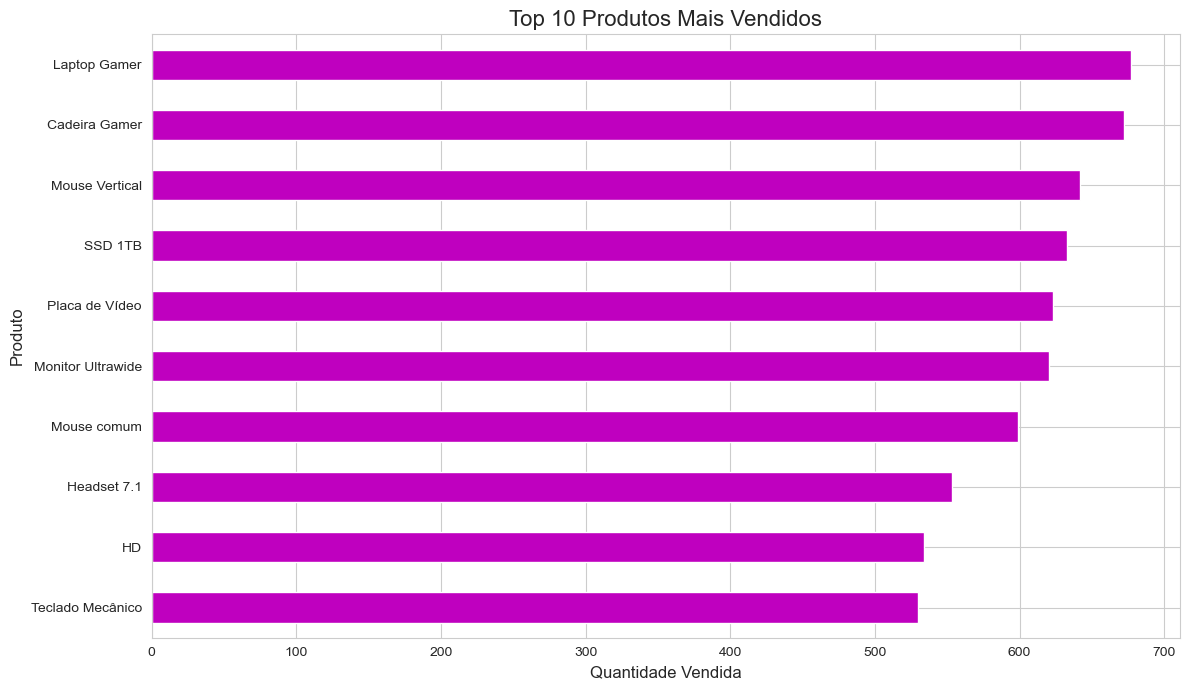

In [99]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 7))

top_10prod.sort_values(ascending = True).plot(kind = 'barh', color = 'm')

plt.title('Top 10 Produtos Mais Vendidos', fontsize = 16)
plt.xlabel('Quantidade Vendida', fontsize = 12)
plt.ylabel('Produto', fontsize = 12)

plt.tight_layout()
plt.show()

In [106]:
df_vendas['Mes'] = df_vendas['Data_Pedido'].dt.to_period('M')
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status de Entrega,Mes
0,1000,2026-01-01 10:00:00,Teclado Mecânico,Acessórios,550.0,5,127,Sao Paulo,SP,2750.0,Rápida,2026-01
1,1001,2026-01-01 15:00:00,SSD 1TB,Hardware,600.0,4,116,Curitiba,PR,2400.0,Normal,2026-01
2,1002,2026-01-01 06:00:00,Laptop Gamer,Acessórios,250.0,6,118,Sao Paulo,SP,1500.0,Rápida,2026-01
3,1003,2026-01-01 23:00:00,Mouse Vertical,Eletrônicos,7500.0,4,141,Sao Paulo,SP,30000.0,Rápida,2026-01
4,1004,2026-01-01 18:00:00,Mouse comum,Acessórios,200.0,4,100,Curitiba,PR,800.0,Normal,2026-01


In [109]:
faturamento_mensal = df_vendas.groupby('Mes')['Faturamento'].sum()


faturamento_mensal.map('R$ {:,.2f}'.format)

Mes
2026-01    R$ 1,006,000.00
2026-02    R$ 1,144,650.00
2026-03    R$ 1,206,350.00
2026-04    R$ 1,167,400.00
2026-05    R$ 1,279,850.00
2026-06    R$ 1,089,650.00
2026-07    R$ 1,357,500.00
2026-08    R$ 1,286,400.00
2026-09    R$ 1,042,950.00
2026-10    R$ 1,143,100.00
Freq: M, Name: Faturamento, dtype: object

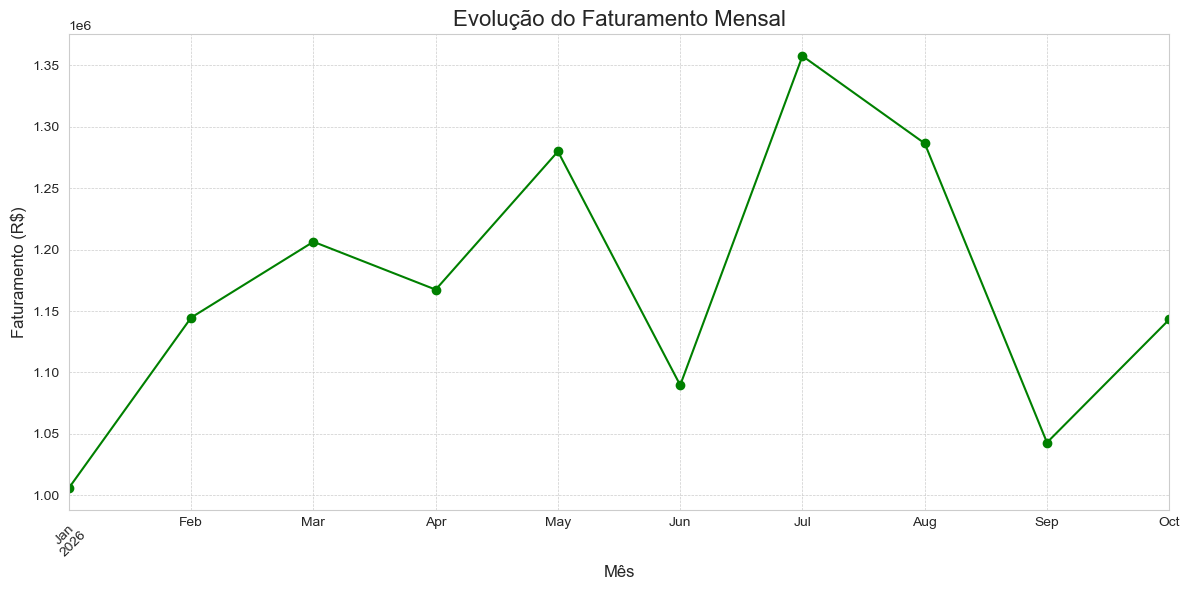

In [110]:
plt.figure(figsize = (12, 6))

faturamento_mensal.plot(kind = 'line', marker = 'o', linestyle = '-', color = 'green')

plt.title('Evolução do Faturamento Mensal', fontsize = 16)

plt.xlabel('Mês', fontsize = 12)

plt.ylabel('Faturamento (R$)', fontsize = 12)

plt.xticks(rotation = 45)

plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.tight_layout()

plt.show()